## MTH9893 Time Series Analysis HW2
* Group 01
* Author: Pan, Hongchao & Sun, Yu
* Kernel version: Python 3.5
* Packages: pandas, statsmodels, numpy, time, matplotlib
* Data: Past 15 years data (Daily, weekly, monthly, quarterly, yearly) of USD/EUR FX-rate, FEDL01 and EUORDEPO rates 
* Notes:
    * The running time of notebook is around 4mins
    * The data sets loaded from the folder 'datasets'

### Answer of Q1

In [1]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import statsmodels.tsa.stattools as tsa  # adfuller test
import time
import warnings

In [2]:
# Record the running time of the notebook
startTALL=time.time()

In [3]:
# Set up the parameters
alpha=[0.1,0.1,0.1]
beta=[0.3,0.3,0.3]
sigma=[0.005,0.005,0.005]
N=2000             # number of simulations
T=[100,250,1250]   # list of numbers of observations

# generate random numbers
def generate_RN(TN):
    x0=alpha[0]/(1-beta[0])
    x=np.zeros(TN) # Generate TN random variables 
    x[0]=x0
    eps=np.random.normal(0.0,sigma[0],TN)  
    for i in range(1,TN):
        x[i]=alpha[0]+beta[0]*x[i-1]+eps[i-1]
    
    return (x)


In [4]:
x=generate_RN(T[2])

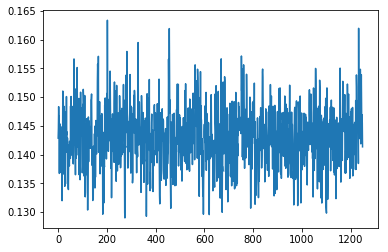

In [5]:
#Take a look at the simulated time series
plt.plot(x)
plt.show()

In [6]:
def MLE_para(Tlist,NN):
    # ts: time series data
    # Tlist: list of T (number of observations)
    # NN: number of simulations
    
#    alphaALL=[]
    betaALL=[]
    sigmaALL=[]
    alphaALL2=[]
    # Avoid . operation to speed up the computation
    alpha2_append=alphaALL2.append
    beta_append=betaALL.append
    sigma_append=sigmaALL.append
    
    beta_res=[]
    sigma_res=[]
    alpha2_res=[]
    
    
    for i in range(len(Tlist)):
        for j in range(NN):
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore') # Not print the warnings
                ts=generate_RN(Tlist[i])  # Generate time series with given T
                model=ARMA(ts[0:Tlist[i]],order=(1,0)).fit(method='mle')
                beta_append(model.params[1])
                sigma_append(np.std(model.resid))
            
                alpha2_append(model.params[0]*(1-model.params[1])) # This returns alpha
        
        beta_res.append(np.average(betaALL))
        sigma_res.append(np.average(sigmaALL))
 
        alpha2_res.append(np.average(alphaALL2))
        
    df=pd.DataFrame({'T':Tlist,'alpha_MLE':alpha2_res,
                     #'alpha2_MLE':alpha2_res,
                     'beta_MLE':beta_res,
                     'sigma_MLE':sigma_res})

    return df

In [7]:
startT=time.time()
df1=MLE_para(T,N)
endT=time.time()
print('Computation time: %s seconds' %(endT-startT))
df1

Computation time: 184.96105098724365 seconds


,T,alpha_MLE,beta_MLE,sigma_MLE
0,100,0.103065,0.278711,0.004909
1,250,0.102177,0.284854,0.004940
2,1250,0.101495,0.289596,0.004957


In [8]:
df_true=pd.DataFrame({'T':T,'alpha':alpha,'beta':beta,'sigma':sigma},index=['i','ii','iii'])
df_true

,T,alpha,beta,sigma
i,100,0.1,0.3,0.005
ii,250,0.1,0.3,0.005
iii,1250,0.1,0.3,0.005


In [9]:
df_q1=df_true.merge(df1,how='inner')
df_q1

,T,alpha,beta,sigma,alpha_MLE,beta_MLE,sigma_MLE
0,100,0.1,0.3,0.005,0.103065,0.278711,0.004909
1,250,0.1,0.3,0.005,0.102177,0.284854,0.004940
2,1250,0.1,0.3,0.005,0.101495,0.289596,0.004957


Table 1 Comparasion of simulated parameters with true values

### Observation of Q1
* The fitted parameters are roughtly consistent with the true values
* Simulated parameters converge to the true values with increasing number of observations
* With same simulation sample size (2000 times here), the simulated parameters converge colser to the true value with higher number of observations.
* The simulated parameters are propotional to the number of observations (T) with same sample size simulations. As we can see in the table above, the more the observations, the closer to the true values. That indicates the MLE estimator is **biased.**

### Answer of Q2

In [10]:
# Get the data
def get_data():
    # Use end of the day (LAST) rates
    # Get the data of FEDL01
    # Daily
    df_FD=pd.read_excel(io='datasets/FEDL01.xlsx',sheetname=0,parse_cols="A:B",skiprows=5)
    # Weekly
    df_FW=pd.read_excel(io='datasets/FEDL01.xlsx',sheetname=1,parse_cols="A:B",skiprows=5)
    # Monthly
    df_FM=pd.read_excel(io='datasets/FEDL01.xlsx',sheetname=2,parse_cols="A:B",skiprows=5)
    # Quarterly
    df_FQ=pd.read_excel(io='datasets/FEDL01.xlsx',sheetname=3,parse_cols="A:B",skiprows=5)
    # Yearly
    df_FY=pd.read_excel(io='datasets/FEDL01.xlsx',sheetname=4,parse_cols="A:B",skiprows=5)
    
    # Get the data of EUORDEPO
    # Daily
    df_ED=pd.read_excel(io='datasets/EUORDEPO.xlsx',sheetname=0,parse_cols="A:B",skiprows=5)
    # Weekly
    df_EW=pd.read_excel(io='datasets/EUORDEPO.xlsx',sheetname=1,parse_cols="A:B",skiprows=5)
    # Monthly
    df_EM=pd.read_excel(io='datasets/EUORDEPO.xlsx',sheetname=2,parse_cols="A:B",skiprows=5)
    # Quarterly
    df_EQ=pd.read_excel(io='datasets/EUORDEPO.xlsx',sheetname=3,parse_cols="A:B",skiprows=5)
    # Yearly
    df_EY=pd.read_excel(io='datasets/EUORDEPO.xlsx',sheetname=4,parse_cols="A:B",skiprows=5)
    
    # Get the data of usd/eur fx-rate (using PX_LAST)
    # Daily
    df_FXD=pd.read_excel(io='datasets/usdeur.xlsx',sheetname=0,parse_cols="A:B",skiprows=1)
    # Weekly
    df_FXW=pd.read_excel(io='datasets/usdeur.xlsx',sheetname=1,parse_cols="A:B",skiprows=1)
    # Monthly
    df_FXM=pd.read_excel(io='datasets/usdeur.xlsx',sheetname=2,parse_cols="A:B",skiprows=1)
    # Quarterly
    df_FXQ=pd.read_excel(io='datasets/usdeur.xlsx',sheetname=3,parse_cols="A:B",skiprows=1)
    # Yearly
    df_FXY=pd.read_excel(io='datasets/usdeur.xlsx',sheetname=4,parse_cols="A:B",skiprows=1)
 
    # Rename the column in the FX dataframes
    df_FXD.columns=['Date','USD/EUR_FX-rate']
    df_FXW.columns=['Date','USD/EUR_FX-rate']
    df_FXM.columns=['Date','USD/EUR_FX-rate']
    df_FXQ.columns=['Date','USD/EUR_FX-rate']
    df_FXY.columns=['Date','USD/EUR_FX-rate']
    
    # Sort the dataframe by date from earliest to newest
    df_ED.sort_values(by='Date',ascending=True,inplace=True)
    df_EW.sort_values(by='Date',ascending=True,inplace=True)
    df_EM.sort_values(by='Date',ascending=True,inplace=True)
    df_EQ.sort_values(by='Date',ascending=True,inplace=True)
    df_EY.sort_values(by='Date',ascending=True,inplace=True)

    df_FD.sort_values(by='Date',ascending=True,inplace=True)
    df_FW.sort_values(by='Date',ascending=True,inplace=True)
    df_FM.sort_values(by='Date',ascending=True,inplace=True)
    df_FQ.sort_values(by='Date',ascending=True,inplace=True)
    df_FY.sort_values(by='Date',ascending=True,inplace=True)

    # df_FX* are already sorted by 'Date'
        
    # Get the differences between EUORDEPO and FEDL01
    df_FXD['FEDL01-EUORDEPO']=df_FD['PX_LAST']-df_ED['PX_LAST']
    df_FXW['FEDL01-EUORDEPO']=df_FW['PX_LAST']-df_EW['PX_LAST']
    df_FXM['FEDL01-EUORDEPO']=df_FM['PX_LAST']-df_EM['PX_LAST']
    df_FXQ['FEDL01-EUORDEPO']=df_FQ['PX_LAST']-df_EQ['PX_LAST']
    df_FXY['FEDL01-EUORDEPO']=df_FY['PX_LAST']-df_EY['PX_LAST']
    
    
    
    return df_FXD, df_FXW, df_FXM, df_FXQ, df_FXY   

In [11]:
df_D, df_W, df_M, df_Q, df_Y=get_data()
# Add the u_t by the effect of cointegration vector alpha
df_D['Xt-Yt']=df_D['USD/EUR_FX-rate']-df_D['FEDL01-EUORDEPO']
df_W['Xt-Yt']=df_W['USD/EUR_FX-rate']-df_W['FEDL01-EUORDEPO']
df_M['Xt-Yt']=df_M['USD/EUR_FX-rate']-df_M['FEDL01-EUORDEPO']
df_Q['Xt-Yt']=df_Q['USD/EUR_FX-rate']-df_Q['FEDL01-EUORDEPO']
df_Y['Xt-Yt']=df_Y['USD/EUR_FX-rate']-df_Y['FEDL01-EUORDEPO']

In [12]:
df_D.head()

,Date,USD/EUR_FX-rate,FEDL01-EUORDEPO,Xt-Yt
0,2002-02-20,1.1497,1.06,0.0897
1,2002-02-21,1.1489,1.06,0.0889
2,2002-02-22,1.1422,1.06,0.0822
3,2002-02-25,1.1501,1.06,0.0901
4,2002-02-26,1.1574,1.06,0.0974


Table 2 Overview of the combined Daily data

In [13]:
df_Y.head()

,Date,USD/EUR_FX-rate,FEDL01-EUORDEPO,Xt-Yt
0,2002-12-31,0.9529,0.53,0.4229
1,2003-12-31,0.7940,0.39,0.4040
2,2004-12-31,0.7378,0.31,0.4278
3,2005-12-30,0.8440,0.14,0.7040
4,2006-12-29,0.7577,0.10,0.6577


Table 3 Overview of the combined yearly data

#### Cointegration Test

* Test steps:

    * Step one: test the $X_t$ and $Y_t$ are $I(1)$
    * Step two is given with $\alpha=(1,-1)^T$
    * Step three: test the new time series $u_t=a^T (Xt,Yt)^T$
    * $X_t$=USD/EUR_FX-rate
    * $Y_t$=FEDL01-EUORDEPO
    * $u_t=a^T (Xt,Yt)^T=X_t-Y_t$

* Define the test funtion to test whether a time series is stationary with **confidence interval 99%**

In [14]:
def stationary_test(TsData,CI):
    # TsData: to be tested time series data
    # CI: the critical value for test statistic, string of 1%, 5%, or 10%
    res=tsa.adfuller(TsData)
    
    # reference: https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test
    if(res[0]>res[4][CI]):
        return (res[0],res[4][CI],'non-stationary')
    else:
        return (res[0],res[4][CI],'stationary')

* **Test the daily data**

In [15]:
# Add dropna to avoid null value in the dataframe 
# (mismatching trading date between USD and EUR, e.g., hollidays)
# Step one: test the X_t and Y_t are I(1)
res_DE=stationary_test(df_D['USD/EUR_FX-rate'].dropna(),'1%')
res_DF=stationary_test(df_D['FEDL01-EUORDEPO'].dropna(),'1%')
# Step two is given with a=(1,-1)^T
# Step three: test the new time series u_t=a^T(Xt,Yt)^T
res_DDiff=stationary_test(df_D['Xt-Yt'].dropna(),'1%')
res_DE=list(res_DE)
res_DF=list(res_DF)
res_DDiff=list(res_DDiff)
res_DE.append('Daily')
res_DF.append('Daily')
res_DDiff.append('Daily')
res_D=pd.DataFrame({'D_USD/EUR_FX-rate':res_DE,'D_FEDL01-EUORDEPO':res_DF,'D_Xt-Yt':res_DDiff},
                index=['adf(test statistic)','CI value','stationary/non-stationary','dataset'])

* **Test weekly data**

In [16]:
# Step one: test the X_t and Y_t are I(1)
res_WE=stationary_test(df_W['USD/EUR_FX-rate'].dropna(),'1%')
res_WF=stationary_test(df_W['FEDL01-EUORDEPO'].dropna(),'1%')
# Step two is given with a=(1,-1)^T
# Step three: test the new time series u_t=a^T(Xt,Yt)^T
res_WDiff=stationary_test(df_W['Xt-Yt'].dropna(),'1%')
res_WE=list(res_WE)
res_WF=list(res_WF)
res_WDiff=list(res_WDiff)
res_WE.append('Weekly')
res_WF.append('Weekly')
res_WDiff.append('Weekly')
res_W=pd.DataFrame({'W_USD/EUR_FX-rate':res_WE,'W_FEDL01-EUORDEPO':res_WF,'W_Xt-Yt':res_WDiff},
                index=['adf(test statistic)','CI value','stationary/non-stationary','dataset'])


* **Test the monthly data**

In [17]:
# Step one: test the X_t and Y_t are I(1)
res_ME=stationary_test(df_M['USD/EUR_FX-rate'].dropna(),'1%')
res_MF=stationary_test(df_M['FEDL01-EUORDEPO'].dropna(),'1%')
# Step two is given with a=(1,-1)^T
# Step three: test the new time series u_t=a^T(Xt,Yt)^T
res_MDiff=stationary_test(df_M['Xt-Yt'].dropna(),'1%')
res_ME=list(res_ME)
res_MF=list(res_MF)
res_MDiff=list(res_MDiff)
res_ME.append('Monthly')
res_MF.append('Monthly')
res_MDiff.append('Monthly')
res_M=pd.DataFrame({'M_USD/EUR_FX-rate':res_ME,'M_FEDL01-EUORDEPO':res_MF,'M_Xt-Yt':res_MDiff},
                index=['adf(test statistic)','CI value','stationary/non-stationary','dataset'])

#### Test quarterly data

In [18]:
# Step one: test the X_t and Y_t are I(1)
res_QE=stationary_test(df_Q['USD/EUR_FX-rate'].dropna(),'1%')
res_QF=stationary_test(df_Q['FEDL01-EUORDEPO'].dropna(),'1%')
# Step two is given with a=(1,-1)^T
# Step three: test the new time series u_t=a^T(Xt,Yt)^T
res_QDiff=stationary_test(df_Q['Xt-Yt'].dropna(),'1%')
res_QE=list(res_QE)
res_QF=list(res_QF)
res_QDiff=list(res_QDiff)
res_QE.append('Quarterly')
res_QF.append('Quarterly')
res_QDiff.append('Quarterly')
res_Q=pd.DataFrame({'Q_USD/EUR_FX-rate':res_QE,'Q_FEDL01-EUORDEPO':res_QF,'Q_Xt-Yt':res_QDiff},
                index=['adf(test statistic)','CI value','stationary/non-stationary','dataset'])

* **Test yearly data**

In [19]:
# Step one: test the X_t and Y_t are I(1)
res_YE=stationary_test(df_Y['USD/EUR_FX-rate'].dropna(),'1%')
res_YF=stationary_test(df_Y['FEDL01-EUORDEPO'].dropna(),'1%')
# Step two is given with a=(1,-1)^T
# Step three: test the new time series u_t=a^T(Xt,Yt)^T
res_YDiff=stationary_test(df_Y['Xt-Yt'].dropna(),'1%')
res_YE=list(res_YE)
res_YF=list(res_YF)
res_YDiff=list(res_YDiff)
res_YE.append('Yearly')
res_YF.append('Yearly')
res_YDiff.append('Yearly')
res_Y=pd.DataFrame({'Y_USD/EUR_FX-rate':res_YE,'Y_FEDL01-EUORDEPO':res_YF,'Y_Xt-Yt':res_YDiff},
                index=['adf(test statistic)','CI value','stationary/non-stationary','dataset'])

/Users/hongchao/anaconda/lib/python3.5/site-packages/statsmodels/regression/linear_model.py:1148: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [20]:
# Combine all the results
df_q2=res_D.join([res_W,res_M,res_Q,res_Y],how='inner')
df_q2

,D_FEDL01-EUORDEPO,D_USD/EUR_FX-rate,D_Xt-Yt,W_FEDL01-EUORDEPO,W_USD/EUR_FX-rate,W_Xt-Yt,M_FEDL01-EUORDEPO,M_USD/EUR_FX-rate,M_Xt-Yt,Q_FEDL01-EUORDEPO,Q_USD/EUR_FX-rate,Q_Xt-Yt,Y_FEDL01-EUORDEPO,Y_USD/EUR_FX-rate,Y_Xt-Yt
adf(test statistic),-0.910243,-3.32562,-0.80936,-1.8592,-3.25526,-2.03443,-2.09317,-3.46007,-2.11865,-2.15852,-3.61292,-2.13703,-0,-0,-2.49839
CI value,-3.43209,-3.43202,-3.43209,-3.43897,-3.43874,-3.43888,-3.46806,-3.46742,-3.46806,-3.54849,-3.54639,-3.54849,-6.04511,-4.66519,-4.66519
stationary/non-stationary,non-stationary,non-stationary,non-stationary,non-stationary,non-stationary,non-stationary,non-stationary,non-stationary,non-stationary,non-stationary,stationary,non-stationary,non-stationary,non-stationary,non-stationary
dataset,Daily,Daily,Daily,Weekly,Weekly,Weekly,Monthly,Monthly,Monthly,Quarterly,Quarterly,Quarterly,Yearly,Yearly,Yearly


Table 4 Cointegration test results with varity data sets

#### Observation of Q2

* All the time series are non-stationary (except the quarterly data of USD/EUR FX-rate)

* The criterion of cointegration are:
    1. $X_t \text{and} Y_t$ are $I(1)$, i.e., non-stationary
    2. $u_t=a^T (Xt,Yt)^T=X_t-Y_t$ is $I(0)$, i.e., stationary
    3. All the tests with daily/weekly/monthly/quarterly/yearly data (except the quarterly data of USD/EUR FX-rate) passed the bullet point 1, but failed on point 2

* The results shows in table 4 indicates that the two time seires are **not** cointegrated with vector $\alpha=(1,-1)^T$, i.e., the proposed theory was not correct.

In [21]:
endTALL=time.time()
print('Running time of notebook: %s seconds' %(endTALL-startTALL))

Running time of notebook: 190.14368605613708 seconds
